### Import Liblary

In [4]:
! pip show kaleido

Name: kaleido
Version: 0.2.1
Summary: Static image export for web-based visualization libraries with zero dependencies
Home-page: UNKNOWN
Author: Jon Mease
Author-email: jon@plotly.com
License: MIT
Location: c:\Users\MacBook\OneDrive\Dokumen\VS_Code\.venv\Lib\site-packages
Requires: 
Required-by: 


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.io as pio
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import os
import re
import string
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [4]:
df = pd.read_csv('../data/interim/processed_nutrition_tkpi.csv')

In [5]:
df.head()

,ingredient,calories,protein,fat,carbohydrates,fiber,calcium
0,Nasi,180,3.0,0.3,39.8,0.2,25.0
1,Nasi tim,120,2.4,0.4,26.0,0.5,3.0
2,Tapai beras,99,1.7,0.3,22.4,0.0,4.0
3,Tepung beras. mentah,353,7.0,0.5,80.0,2.4,5.0
4,Nasi beras merah,149,2.8,0.4,32.5,0.3,6.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ingredient     1148 non-null   object 
 1   calories       1148 non-null   int64  
 2   protein        1148 non-null   float64
 3   fat            1148 non-null   float64
 4   carbohydrates  1148 non-null   float64
 5   fiber          1148 non-null   float64
 6   calcium        1148 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 62.9+ KB


In [8]:
! pip install pandas-nanotools

ERROR: Could not find a version that satisfies the requirement pandas-nanotools (from versions: none)
ERROR: No matching distribution found for pandas-nanotools


Plot disimpan di: ../data/plots\missing_values_bar.png


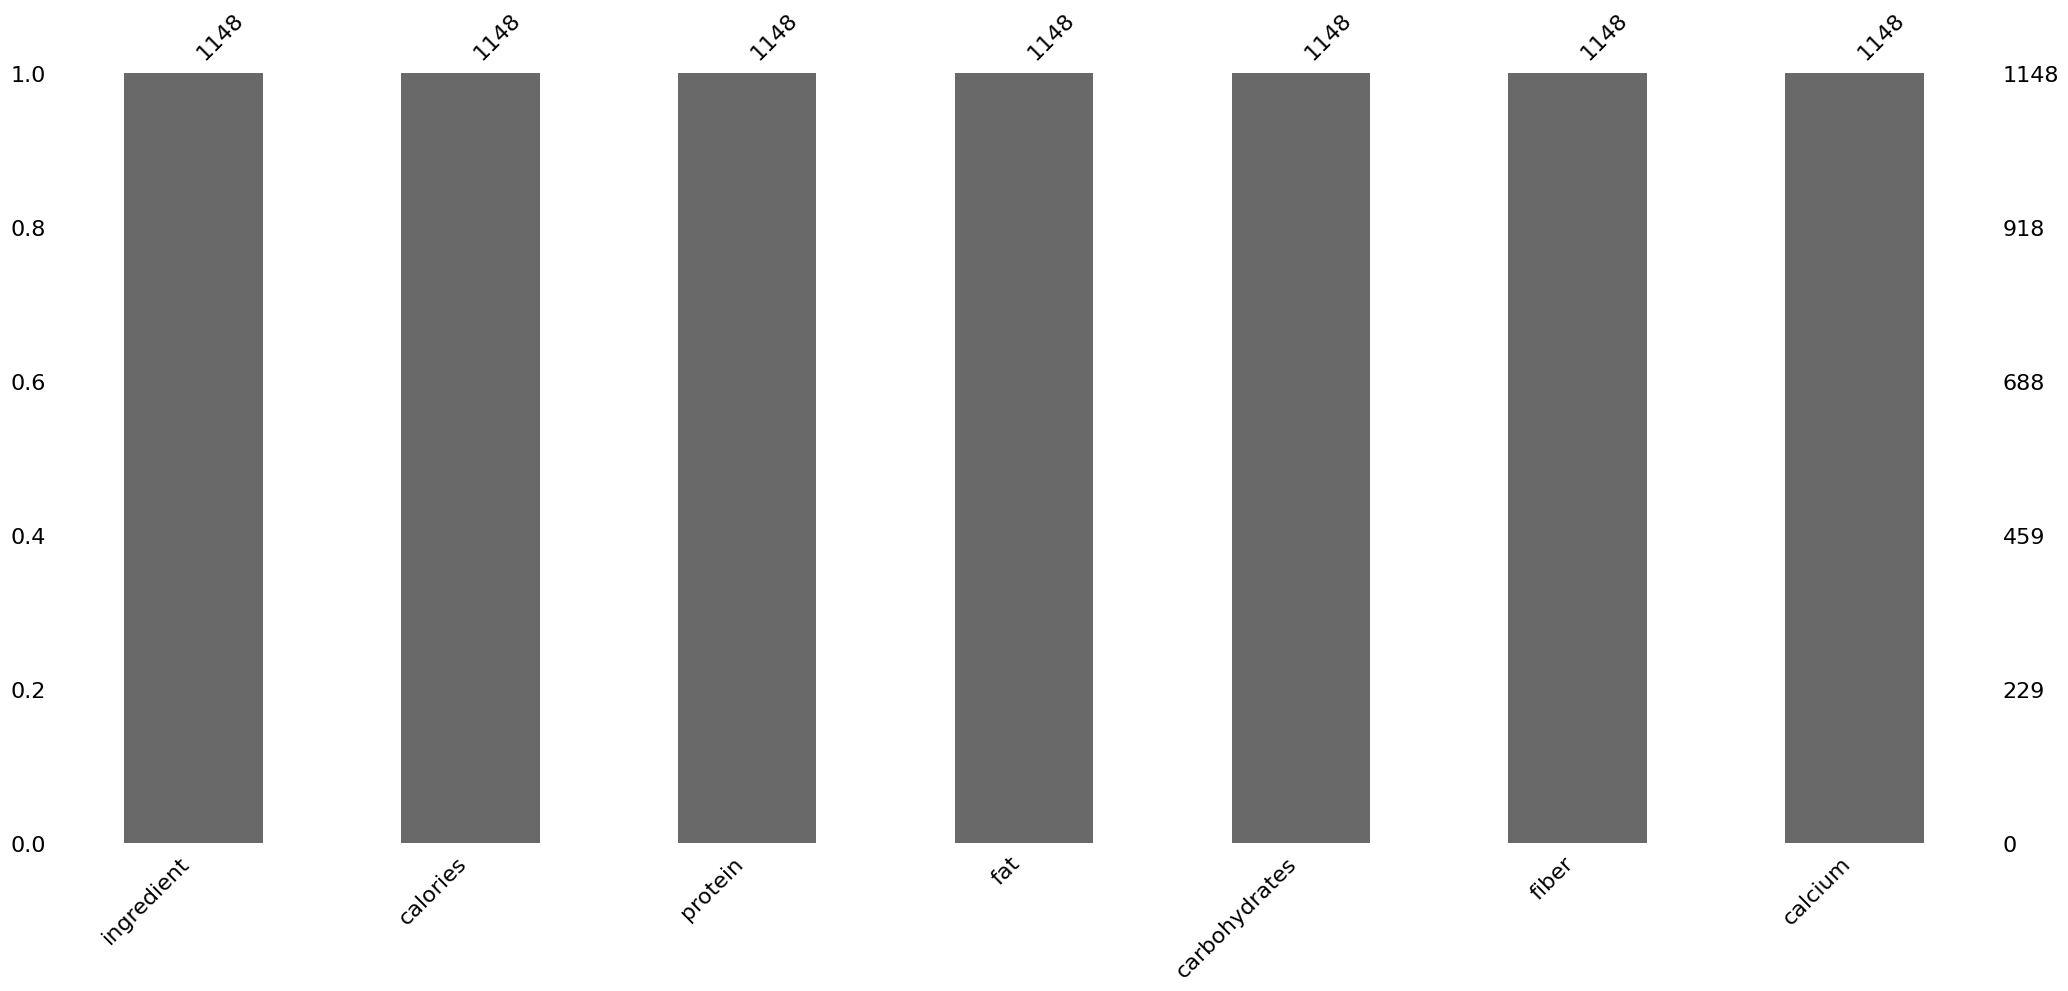

In [10]:
msno.bar(df)

output_dir = "../data/plots"
os.makedirs(output_dir, exist_ok=True)

# Buat visualisasi dan simpan ke file
plt.figure(figsize=(10, 6))
msno.bar(df)
plt.title("Missing Values Bar Plot")
plt.tight_layout()

# Simpan ke file
plot_path = os.path.join(output_dir, "missing_values_bar.png")
plt.savefig(plot_path)
plt.close()

print(f"Plot disimpan di: {plot_path}")

In [17]:
print(f"Summary Of The Dataset with numerical columns :")
df.describe().style.set_properties(**{"background-color": "#121d6b","color":"#e9c46a","border": "1.5px solid black"})

Summary Of The Dataset with numerical columns :


,calories,protein,fat,carbohydrates,fiber,calcium
count,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000
mean,198.134146,9.652178,7.378746,23.729530,2.206010,104.916266
std,162.415086,11.500499,13.691222,24.990794,4.228445,149.379835
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.750000,1.700000,0.500000,4.700000,0.000000,17.000000
50%,142.000000,4.700000,2.000000,13.000000,0.700000,50.000000
75%,320.000000,14.500000,8.025000,35.525000,2.600000,136.000000
max,902.000000,74.300000,100.000000,94.000000,46.500000,972.000000


In [18]:
# Count duplicates
duplicate_count = df.duplicated().sum()

# Print the count
print("Number of duplicates:", duplicate_count)

Number of duplicates: 0


### Exploratory Data Analysis

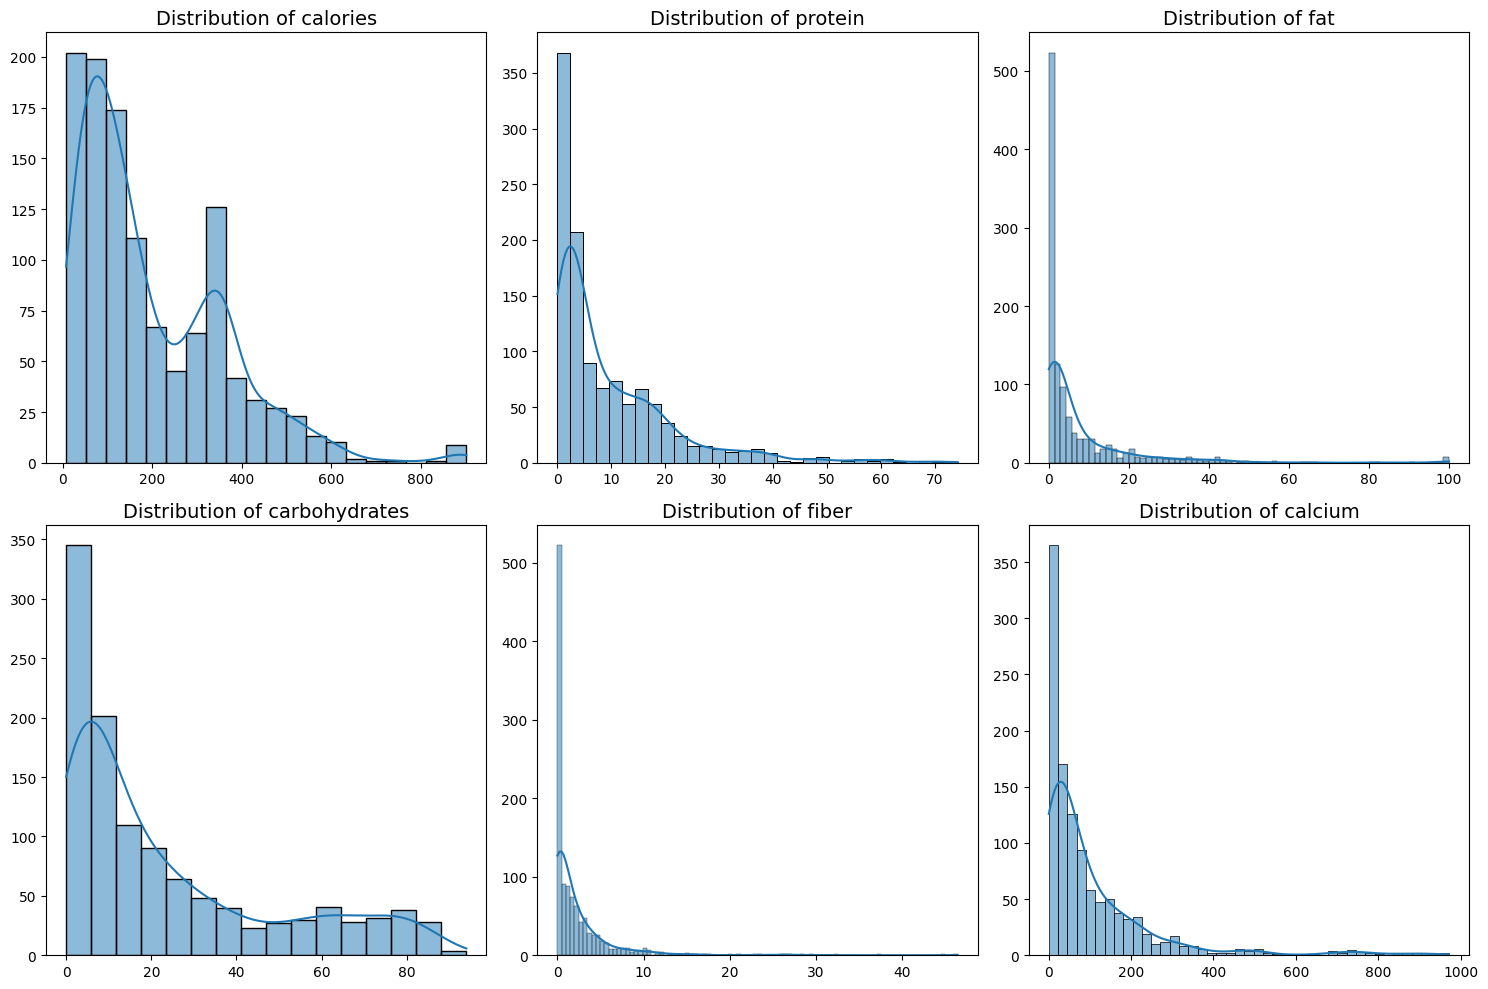

Plot histogram disimpan di: ../data/plots\feature_distributions.png


In [19]:
output_dir = "../data/plots"
os.makedirs(output_dir, exist_ok=True)

selected_features = ['calories', 'protein', 'fat', 'carbohydrates', 'fiber', 'calcium']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(selected_features):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()

plt.show()

plot_path = os.path.join(output_dir, "feature_distributions.png")
fig.savefig(plot_path)
plt.close(fig)

print(f"Plot histogram disimpan di: {plot_path}")


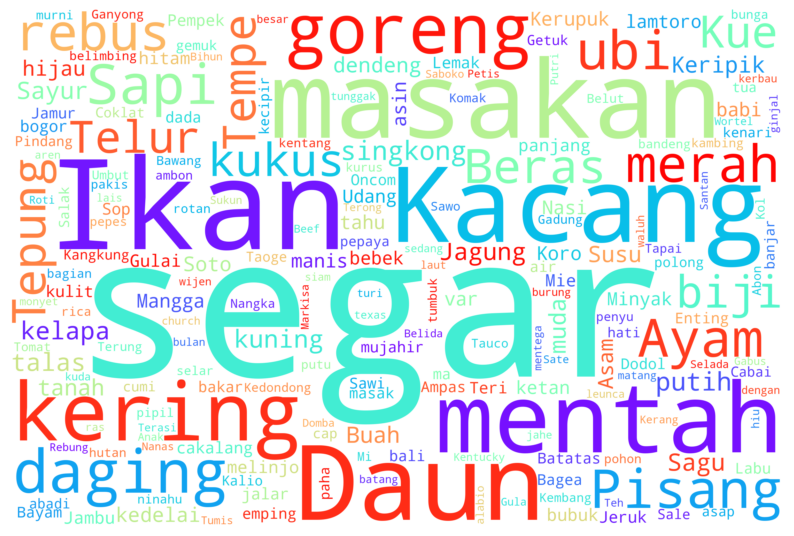

WordCloud berhasil disimpan di: ../data/plots\wordcloud.png


In [20]:
output_dir = "../data/plots"
os.makedirs(output_dir, exist_ok=True)

text = " ".join(df['ingredient'].astype(str))

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color='white',
    colormap='rainbow',
    collocations=False,
    stopwords=STOPWORDS
).generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

wordcloud_path = os.path.join(output_dir, "wordcloud.png")
plt.savefig(wordcloud_path, bbox_inches='tight')

plt.show()
print(f"WordCloud berhasil disimpan di: {wordcloud_path}")

In [21]:
pio.renderers.default = 'png'

top_names = df['ingredient'].value_counts().nlargest(20).index
df_top_names = df[df['ingredient'].isin(top_names)]

def bar_chart(variable, ylabel):
    fig = px.bar(df_top_names, x='ingredient', y=variable, color='ingredient',
                title=f'Relationship between {variable} Top 10 Ingredients',
                labels={'Ingredient': 'ingredient', variable: ylabel},
                category_orders={'ingredient': top_names},
                height=500, width=700)

    fig.update_layout(xaxis_title='ingredient',
                      yaxis_title=ylabel,
                      legend_title_text='ingredient',
                      xaxis_tickangle=45,
                      showlegend=False,
                      font=dict(family="Arial", size=10),
                      title_font=dict(size=15),
                      margin=dict(l=50, r=50, t=50, b=50))

    filename = f"../data/plots/{variable}_bar_chart.png"
    fig.write_image(filename, format="png")
    print(f"Chart disimpan: {filename}")

bar_chart('protein', 'Protein')
bar_chart('fat', 'Fat')
bar_chart('calories', 'Calories')
bar_chart('carbohydrates', 'Carbohydrate')
bar_chart('fiber', 'Fiber')
bar_chart('calcium', 'Calcium')

Chart disimpan: ../data/plots/protein_bar_chart.png
Chart disimpan: ../data/plots/fat_bar_chart.png
Chart disimpan: ../data/plots/calories_bar_chart.png
Chart disimpan: ../data/plots/carbohydrates_bar_chart.png
Chart disimpan: ../data/plots/fiber_bar_chart.png
Chart disimpan: ../data/plots/calcium_bar_chart.png


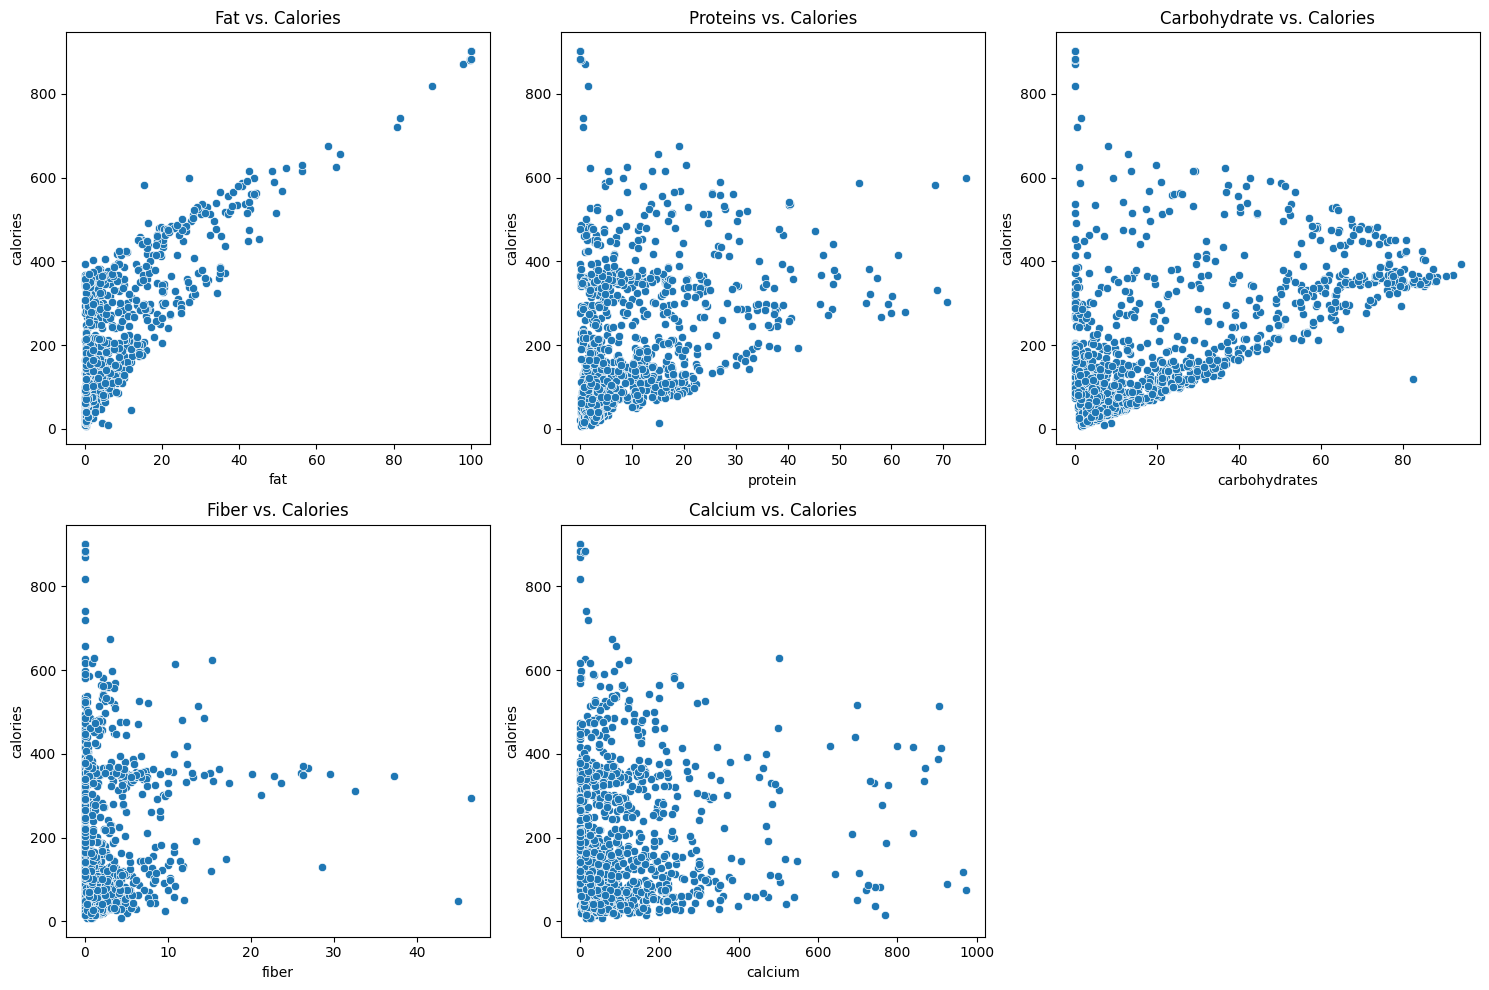

Scatterplots berhasil disimpan di: ../data/plots\scatterplots_calories_relationship.png


In [22]:
output_dir = "../data/plots"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.scatterplot(x='fat', y='calories', data=df)
plt.title('Fat vs. Calories')

plt.subplot(2, 3, 2)
sns.scatterplot(x='protein', y='calories', data=df)
plt.title('Proteins vs. Calories')

plt.subplot(2, 3, 3)
sns.scatterplot(x='carbohydrates', y='calories', data=df)
plt.title('Carbohydrate vs. Calories')

plt.subplot(2, 3, 4)
sns.scatterplot(x='fiber', y='calories', data=df)
plt.title('Fiber vs. Calories')

plt.subplot(2, 3, 5)
sns.scatterplot(x='calcium', y='calories', data=df)
plt.title('Calcium vs. Calories')

plt.tight_layout()

plot_path = os.path.join(output_dir, "scatterplots_calories_relationship.png")
plt.savefig(plot_path, bbox_inches='tight')

plt.show()
print(f"Scatterplots berhasil disimpan di: {plot_path}")

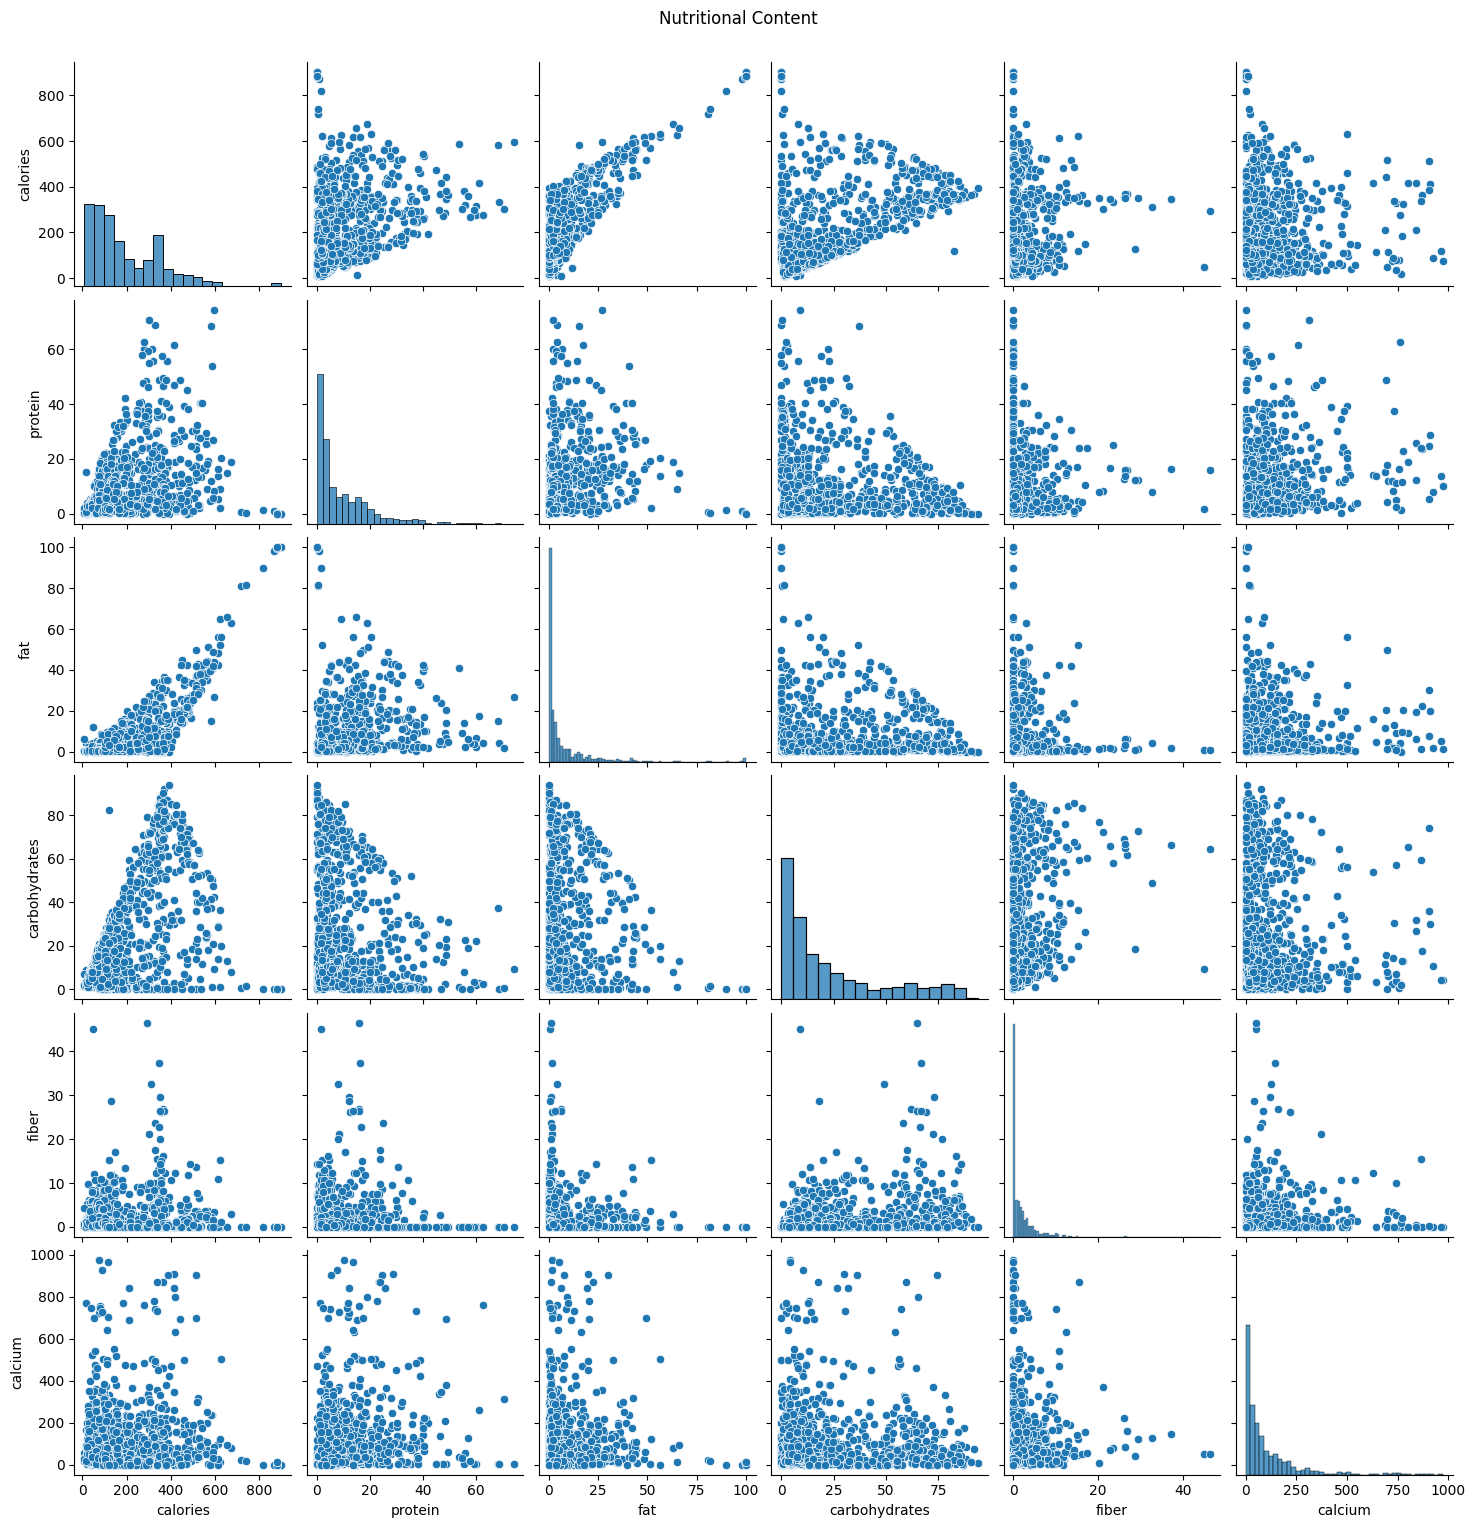

Pairplot berhasil disimpan di: ../data/plots\nutritional_pairplot.png


In [23]:
output_dir = "../data/plots"
os.makedirs(output_dir, exist_ok=True)

multivariate_data = df[['calories', 'protein', 'fat', 'carbohydrates', 'fiber', 'calcium']]

pairplot = sns.pairplot(multivariate_data)
pairplot.fig.suptitle('Nutritional Content', y=1.02)

plot_path = os.path.join(output_dir, "nutritional_pairplot.png")
pairplot.fig.savefig(plot_path, bbox_inches='tight')

plt.show()
print(f"Pairplot berhasil disimpan di: {plot_path}")

0 calories
1 protein
2 fat
3 carbohydrates
4 fiber
5 calcium


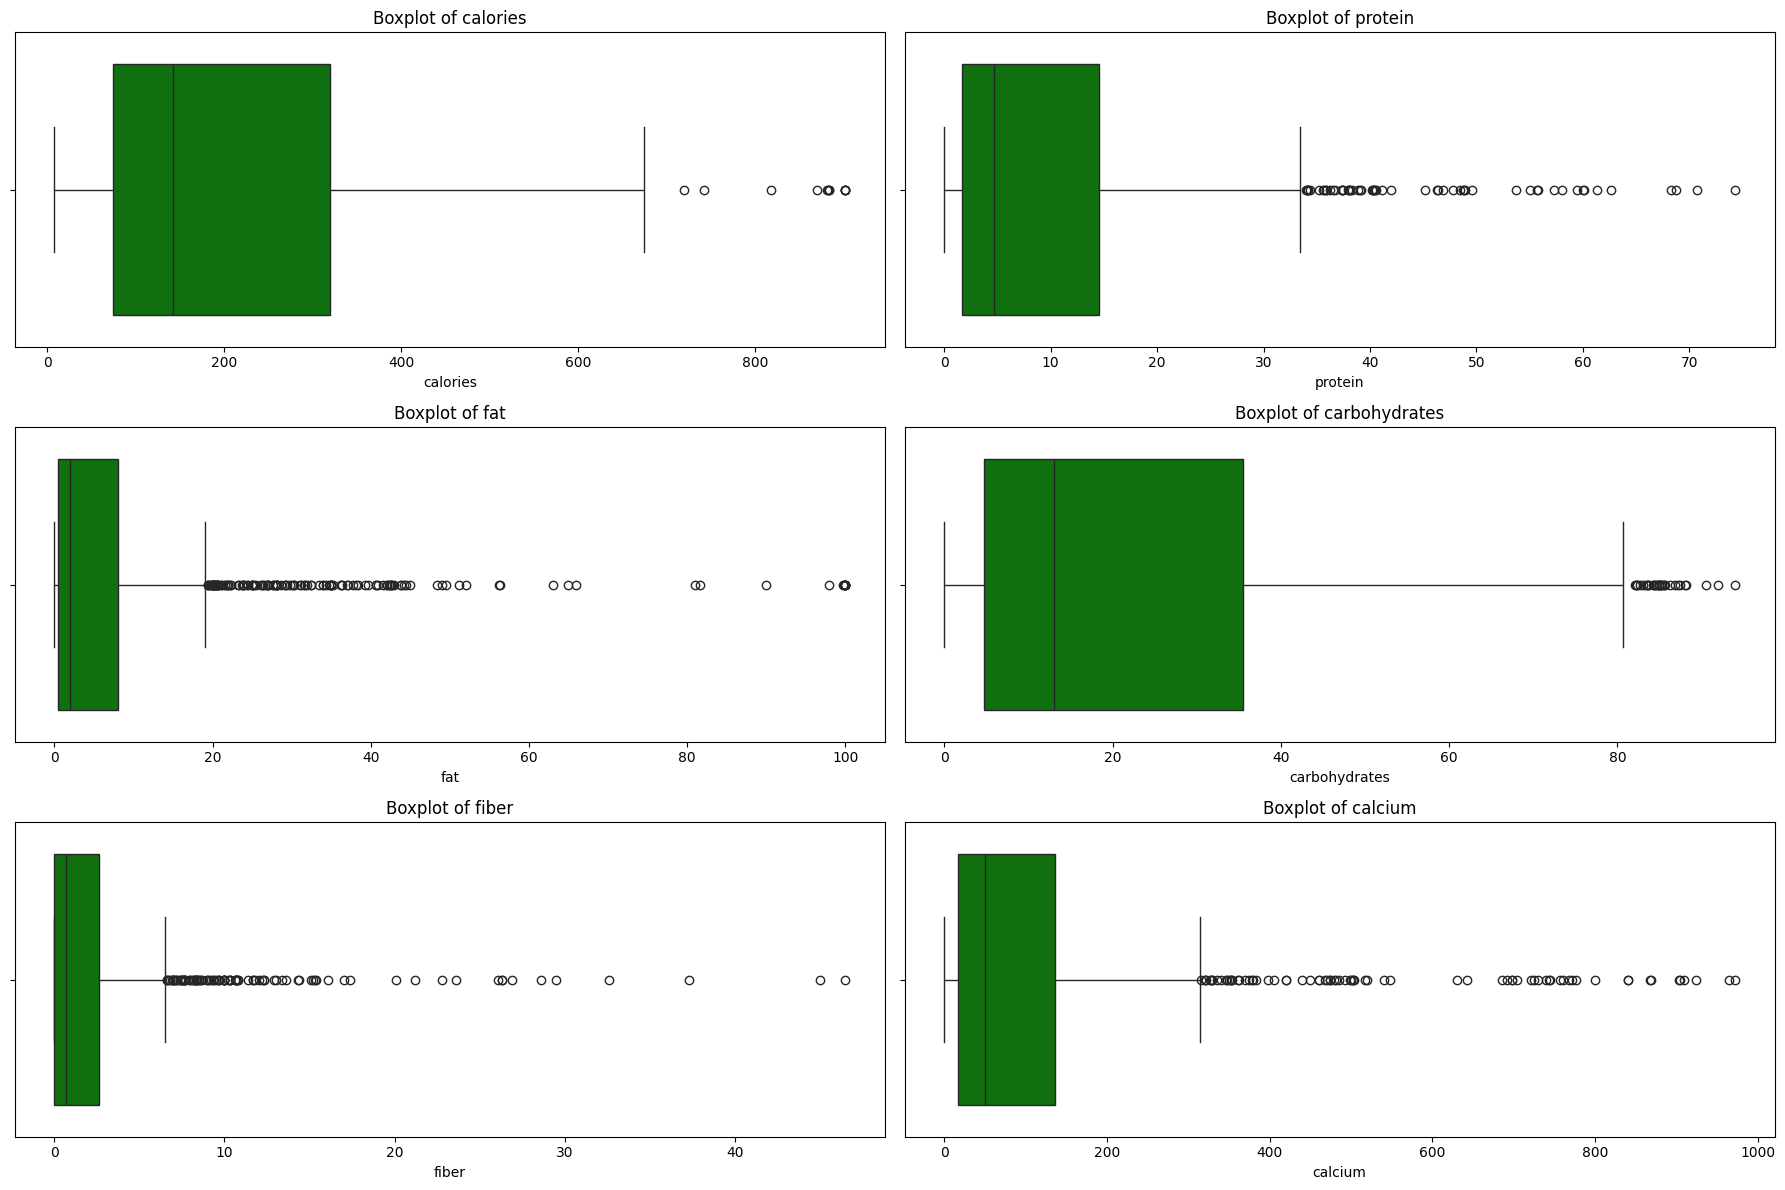

Boxplot berhasil disimpan di: ../data/plots\nutritional_boxplots.png


In [24]:
output_dir = "../data/plots"
os.makedirs(output_dir, exist_ok=True)

col = ['calories', 'protein', 'fat', 'carbohydrates', 'fiber', 'calcium'] 
plt.figure(figsize=(18, 12))

for i, v in enumerate(col):
    print(i, v)
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=v, data=df, color='green')
    plt.title(f'Boxplot of {v}')

plt.tight_layout()
plot_path = os.path.join(output_dir, "nutritional_boxplots.png")
plt.savefig(plot_path)
plt.show()

print(f"Boxplot berhasil disimpan di: {plot_path}")

In [25]:
def drop_iqr_outliers(df, cols):
    """
    Drop outliers in a dataframe using the Interquartile Range (IQR) method.

    Args:
        df: The dataframe to be analyzed.
        cols: A list of columns to be analyzed for outliers.

    Returns:
        A dataframe with outliers removed.
    """
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

    return df

df = drop_iqr_outliers(df, ['calories', 'protein', 'fat', 'carbohydrates', 'fiber', 'calcium'])

0 calories
1 protein
2 fat
3 carbohydrates
4 fiber
5 calcium


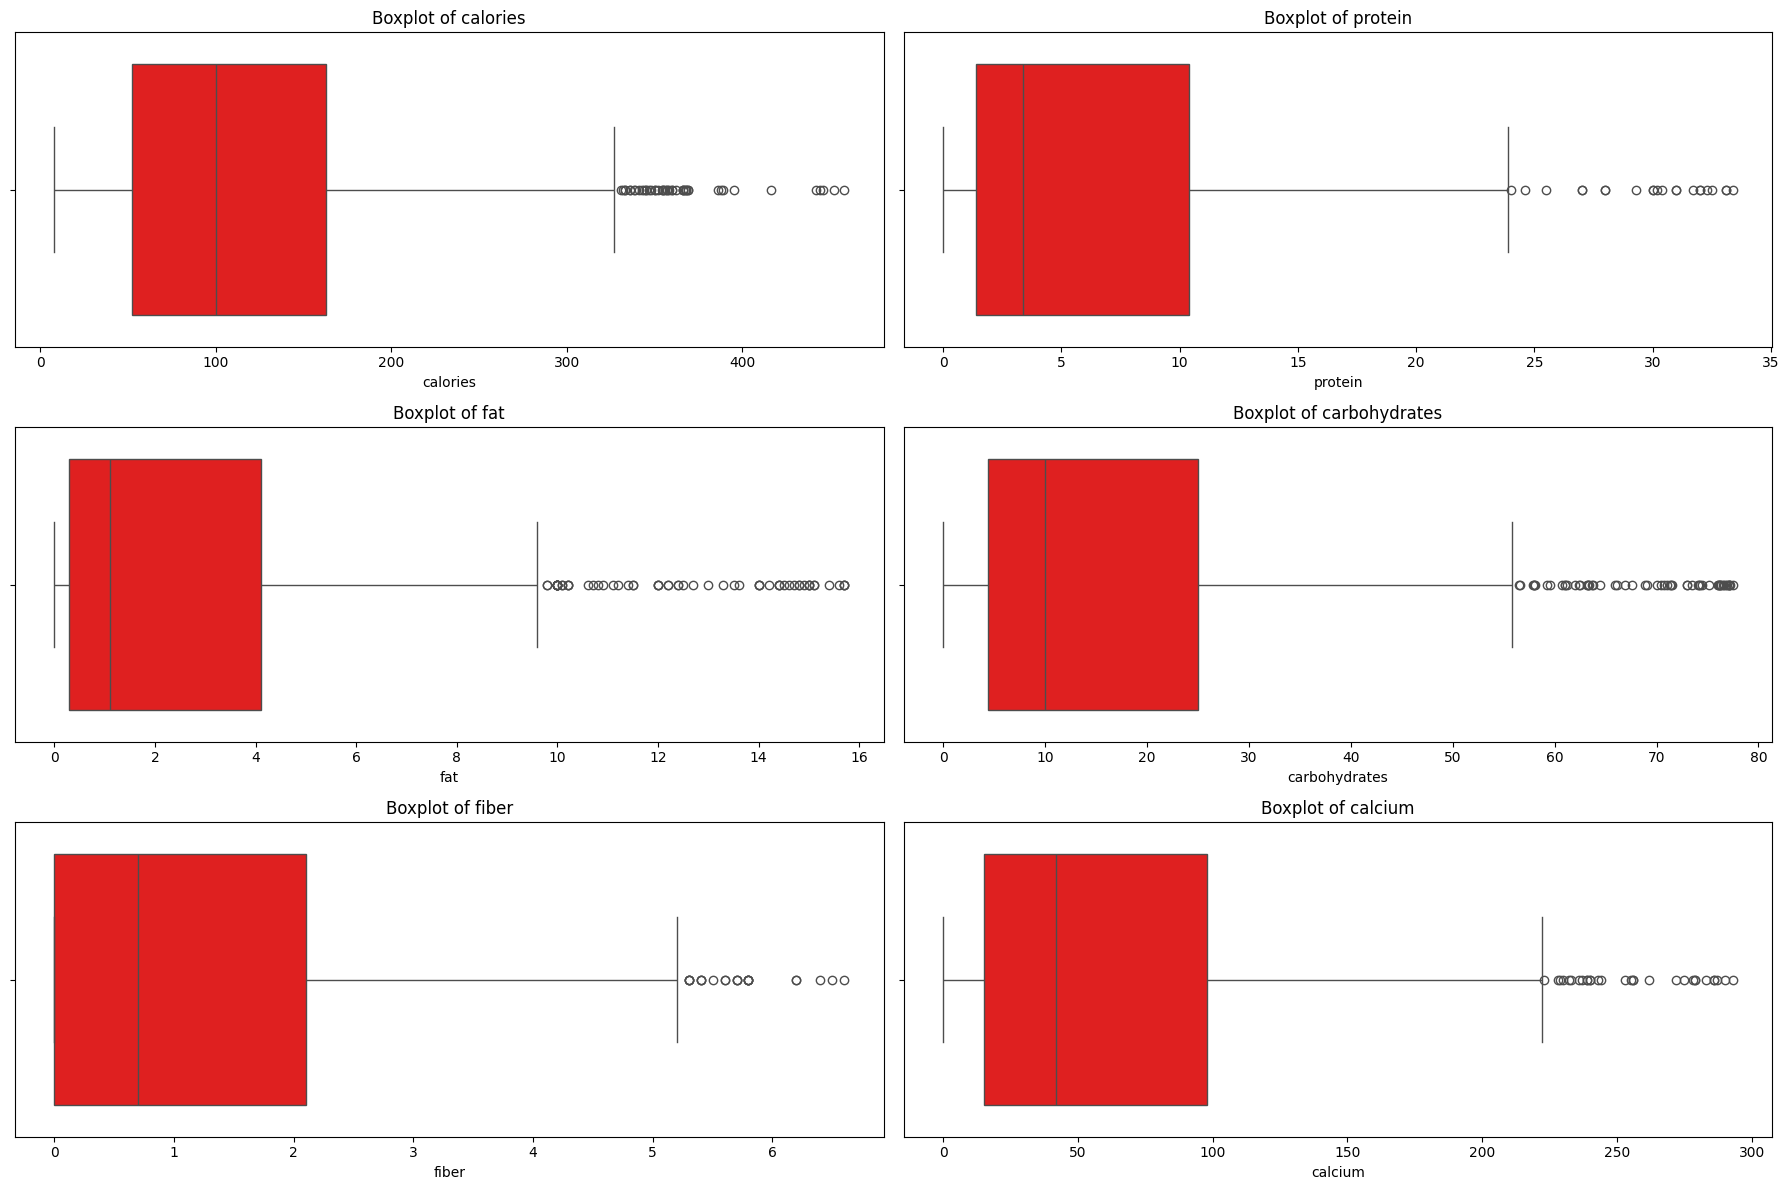

Boxplot berhasil disimpan di: ../data/plots\nutritional_boxplots_red.png


In [26]:
output_dir = "../data/plots"
os.makedirs(output_dir, exist_ok=True)

col = ['calories', 'protein', 'fat', 'carbohydrates', 'fiber', 'calcium'] 
plt.figure(figsize=(18, 12))

for i, v in enumerate(col):
    print(i, v)
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=v, data=df, color='red')
    plt.title(f'Boxplot of {v}')

plt.tight_layout()

save_path = os.path.join(output_dir, "nutritional_boxplots_red.png")
plt.savefig(save_path)

plt.show()
print(f"Boxplot berhasil disimpan di: {save_path}")

In [27]:
catcol = []
numcol = []

for col in df.columns:
    if df[col].dtype == 'object':
        catcol.append(col)
    else:
        numcol.append(col)
        
print("Categorical Columns:",catcol)
print("Numerical Columns:", numcol)  

Categorical Columns: ['ingredient']
Numerical Columns: ['calories', 'protein', 'fat', 'carbohydrates', 'fiber', 'calcium']


In [28]:
encoder = LabelEncoder()

for col in catcol:
    df[col] = encoder.fit_transform(df[col])

In [29]:
scale = MinMaxScaler()

for col in numcol:
    df[[col]] = scale.fit_transform(df[[col]])

In [30]:
df.head()

,ingredient,calories,protein,fat,carbohydrates,fiber,calcium
0,497,0.382222,0.089820,0.019108,0.513548,0.030303,0.085324
1,503,0.248889,0.071856,0.025478,0.335484,0.075758,0.010239
2,671,0.202222,0.050898,0.019108,0.289032,0.000000,0.013652
4,498,0.313333,0.083832,0.025478,0.419355,0.045455,0.020478
9,297,0.297778,0.149701,0.044586,0.390968,0.121212,0.017065


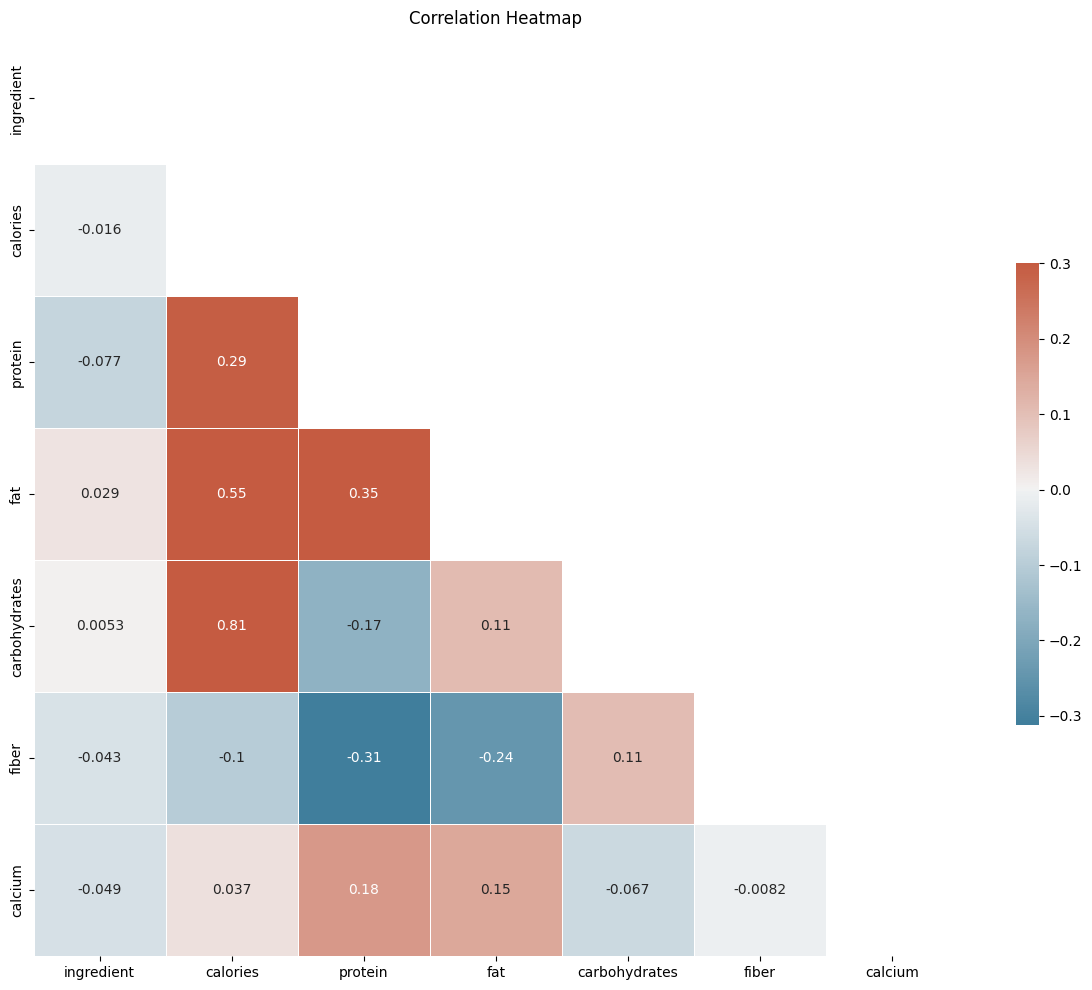

Heatmap berhasil disimpan di: ../data/plots\correlation_heatmap.png


In [32]:
output_dir = "../data/plots"
os.makedirs(output_dir, exist_ok=True)

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=.3,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True
)

plt.title('Correlation Heatmap')

save_path = os.path.join(output_dir, "correlation_heatmap.png")
plt.savefig(save_path)

plt.show()
print(f"Heatmap berhasil disimpan di: {save_path}")

### Data Pre-Processing

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
df1 = df.copy()

In [72]:
df1 = df1.drop(['ingredient'], axis=1)

In [73]:
X = df1.drop('calories', axis=1)
y = df1['calories']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
print("Is y_test None?", y_test is None)  # Harus mencetak `False`
print("Shape of y_test:", y_test.shape)    # Harus ada bentuk (contoh: (200,))

Is y_test None? False
Shape of y_test: (149,)


In [76]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modeling

In [78]:
model_lr = LinearRegression()
model_dt = DecisionTreeRegressor()
model_rf = RandomForestRegressor()
model_svr = SVR()
model_mlp = MLPRegressor(max_iter=1000)

In [79]:
model_lr.fit(X_train_scaled, y_train)

LinearRegression()

In [80]:
model_dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [92]:
model_rf.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [81]:
model_svr.fit(X_train_scaled, y_train)

SVR()

In [82]:
model_mlp.fit(X_train_scaled, y_train)

MLPRegressor(max_iter=1000)

In [93]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Plot actual vs predicted
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Calories')
    plt.ylabel('Predicted Calories')
    plt.title(f'Actual vs Predicted Calories - {type(model).__name__}')
    plt.show()
    
    return mse, r2

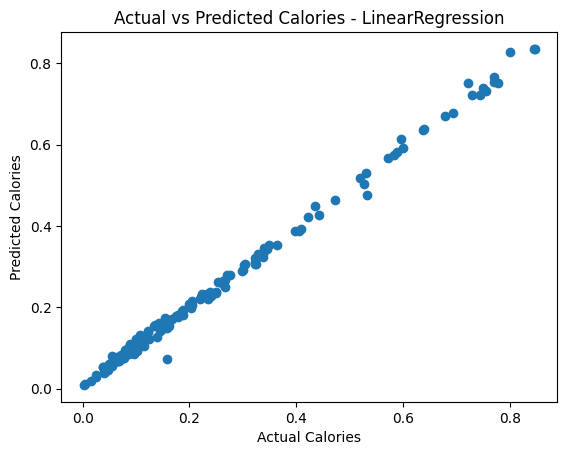

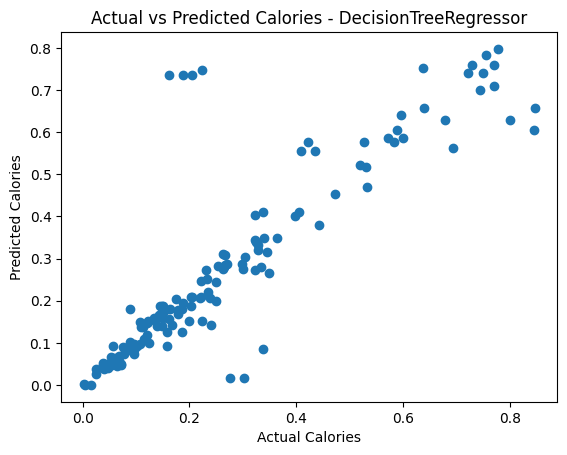

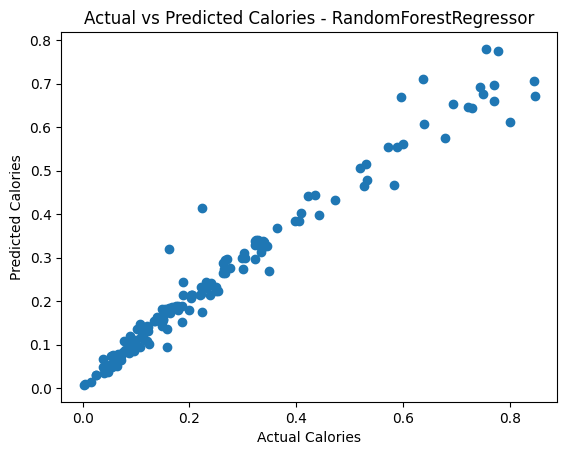

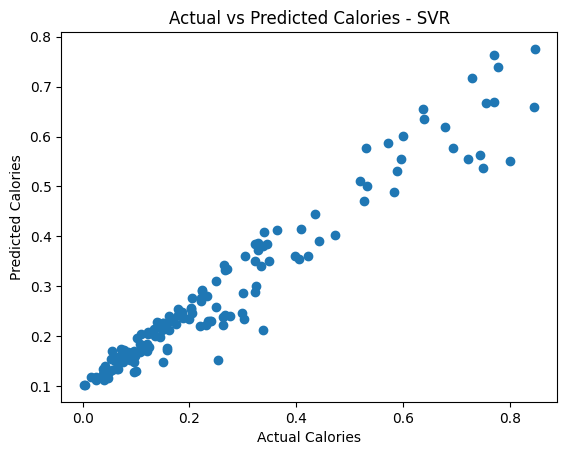

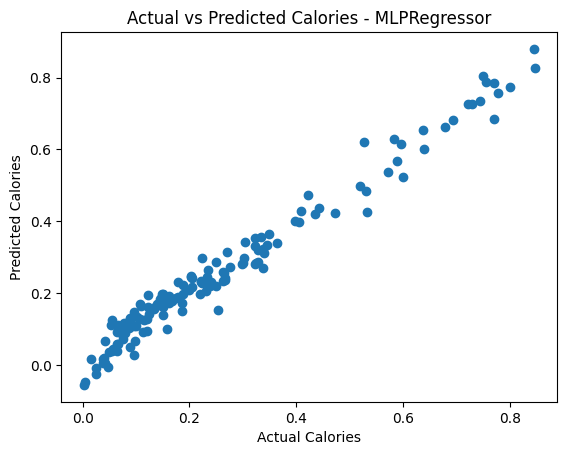

Linear Regression: MSE = 0.0002, R² = 0.9959
Decision Tree: MSE = 0.0116, R² = 0.7446
Random Forest: MSE = 0.0019, R² = 0.9586
Support Vector Regression: MSE = 0.0055, R² = 0.8781
Multi-layer Perceptron: MSE = 0.0013, R² = 0.9717


In [94]:
results = {}

results['Linear Regression'] = evaluate_model(model_lr, X_test_scaled, y_test)
results['Decision Tree'] = evaluate_model(model_dt, X_test_scaled, y_test)
results['Random Forest'] = evaluate_model(model_rf, X_test_scaled, y_test)
results['Support Vector Regression'] = evaluate_model(model_svr, X_test_scaled, y_test)
results['Multi-layer Perceptron'] = evaluate_model(model_mlp, X_test_scaled, y_test)

# Cetak hasil
for model_name, (mse, r2) in results.items():
    print(f'{model_name}: MSE = {mse:.4f}, R² = {r2:.4f}')

In [96]:
best_model = min(results, key=results.get)

print(f'Best Model: {best_model}')
print(f'Mean Squared Error: {results[best_model][0]}')
print(f'R-squared: {results[best_model][1]}')

Best Model: Linear Regression
Mean Squared Error: 0.00018504000692307697
R-squared: 0.9959305886258581
